In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar
%matplotlib inline

In [7]:
uber=pd.read_csv("UberDrives.csv")

In [8]:
uber.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [23]:
uber.isnull().sum() #for checkin the values having null values

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [22]:
uber.isnull().any()  #that is used to count true values for checking those columns in which there is any null values

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [25]:
data1=uber.dropna()## for dropping the null values

In [27]:
data1.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [37]:
### for covrting date type object into date
uber['START_DATE*'] = pd.to_datetime(uber['START_DATE*'], format='%m/%d/%Y %H:%M', errors='coerce')
uber['END_DATE*'] = pd.to_datetime(uber['END_DATE*'], format='%m/%d/%Y %H:%M', errors='coerce')

In [49]:
uber.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
Hour                  float64
Day                   float64
Day Of Week           float64
Month                 float64
Weekday                object
dtype: object

In [50]:


hour = []
day = []
dayofweek = []
month = []
weekday = []

for i in uber['START_DATE*']:
    hour.append(i.hour)
    day.append(i.day)
    dayofweek.append(i.dayofweek if pd.notna(i) else None)
    month.append(i.month)
    weekday.append(calendar.day_name[int(i.dayofweek)] if pd.notna(i) and not pd.isna(i.dayofweek) else None)

uber['Hour'] = hour
uber['Day'] = day
uber['Day Of Week'] = dayofweek
uber['Month'] = month
uber['Weekday'] = weekday


In [51]:
uber.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Hour,Day,Day Of Week,Month,Weekday
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21.0,1.0,4.0,1.0,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,1.0,2.0,5.0,1.0,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20.0,2.0,5.0,1.0,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17.0,5.0,1.0,1.0,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14.0,6.0,2.0,1.0,Wednesday


In [55]:
### categories we have
uber['CATEGORY*'].value_counts()

Business    1078
Personal      77
Name: CATEGORY*, dtype: int64

<Axes: xlabel='CATEGORY*', ylabel='count'>

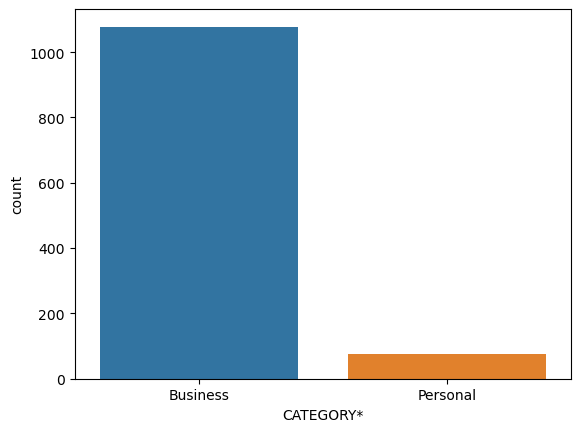

In [56]:
sns.countplot(x='CATEGORY*',data=uber)

In [59]:
uber.sort_values(by='MILES*',ascending = False)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Hour,Day,Day Of Week,Month,Weekday
1155,NaT,NaT,NaN,NaN,NaN,12204.7,NaN,NaN,NaN,NaN,NaN,None
269,2016-03-25 16:52:00,2016-03-25 22:22:00,Business,Latta,Jacksonville,310.3,Customer Visit,16.0,25.0,4.0,3.0,Friday
270,2016-03-25 22:54:00,2016-03-26 01:39:00,Business,Jacksonville,Kissimmee,201.0,Meeting,22.0,25.0,4.0,3.0,Friday
881,2016-10-30 15:22:00,2016-10-30 18:23:00,Business,Asheville,Mebane,195.9,NaN,15.0,30.0,6.0,10.0,Sunday
776,2016-09-27 21:01:00,2016-09-28 02:37:00,Business,Unknown Location,Unknown Location,195.6,NaN,21.0,27.0,1.0,9.0,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...
1121,2016-12-27 12:53:00,2016-12-27 12:57:00,Business,Kar?chi,Kar?chi,0.6,Meal/Entertain,12.0,27.0,1.0,12.0,Tuesday
1110,2016-12-24 22:04:00,2016-12-24 22:09:00,Business,Lahore,Lahore,0.6,Errand/Supplies,22.0,24.0,5.0,12.0,Saturday
44,2016-01-26 17:27:00,2016-01-26 17:29:00,Business,Cary,Cary,0.5,Errand/Supplies,17.0,26.0,1.0,1.0,Tuesday
420,2016-06-08 17:16:00,2016-06-08 17:18:00,Business,Soho,Tribeca,0.5,Errand/Supplies,17.0,8.0,2.0,6.0,Wednesday


In [60]:
uber['MILES*'].value_counts()

9.9        28
3.1        26
2.1        19
10.4       19
3.0        19
           ..
30.0        1
46.9        1
40.2        1
16.6        1
12204.7     1
Name: MILES*, Length: 257, dtype: int64

<Axes: xlabel='MILES*', ylabel='Count'>

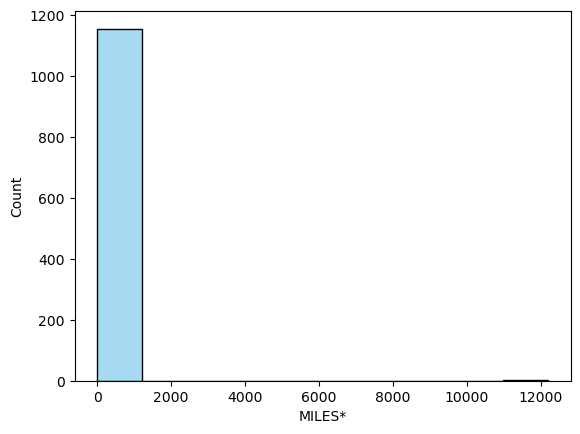

In [71]:
sns.histplot(uber['MILES*'], bins=10, kde=False, color='skyblue')


<Axes: ylabel='Frequency'>

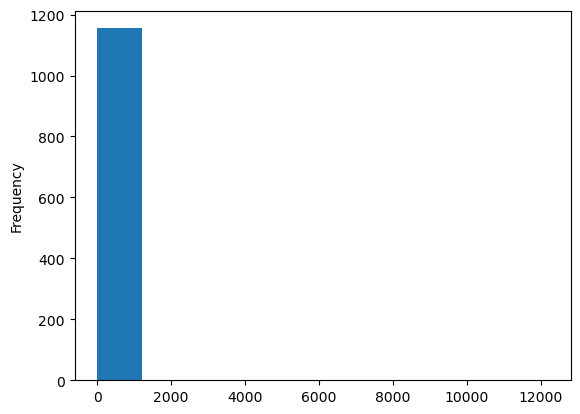

In [65]:
uber['MILES*'].plot.hist()

In [72]:
#analysis for checking hours
hour = uber['START_DATE*'].dt.hour.value_counts()

Text(0.5, 1.0, 'Number of trips vs Hours')

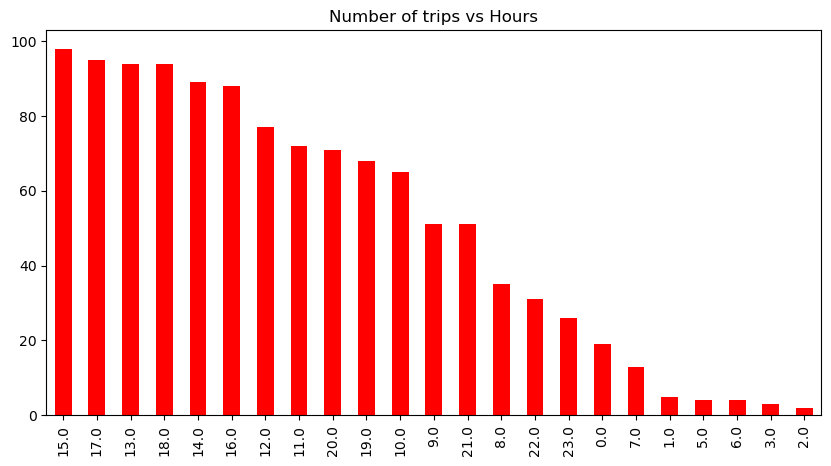

In [90]:
hour.plot.bar(color='red',figsize=(10,5))
plt.title('Number of trips vs Hours')


In [101]:
import plotly.express as px

# Assuming 'hour' is a pandas Series or DataFrame column
fig = px.bar(hour)#,  labels={'index': 'Hours', 'value': 'Peoples'})
fig.update_layout(title='Number of trips vs Hours', xaxis_title='Hours', yaxis_title='Peoples')

# Add hover information
fig.update_traces(hovertemplate='Hour: %{x}<br>Peoples: %{y}')

# Show the interactive plot
fig

<Axes: >

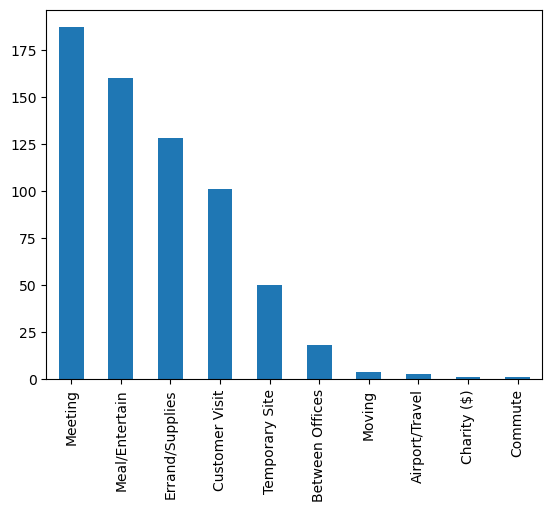

In [100]:
### CHECK THE PURPOSE OF TRIPS
uber['PURPOSE*'].value_counts().plot.bar()

In [102]:
uber.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Hour,Day,Day Of Week,Month,Weekday
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21.0,1.0,4.0,1.0,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,1.0,2.0,5.0,1.0,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20.0,2.0,5.0,1.0,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17.0,5.0,1.0,1.0,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14.0,6.0,2.0,1.0,Wednesday


<Axes: >

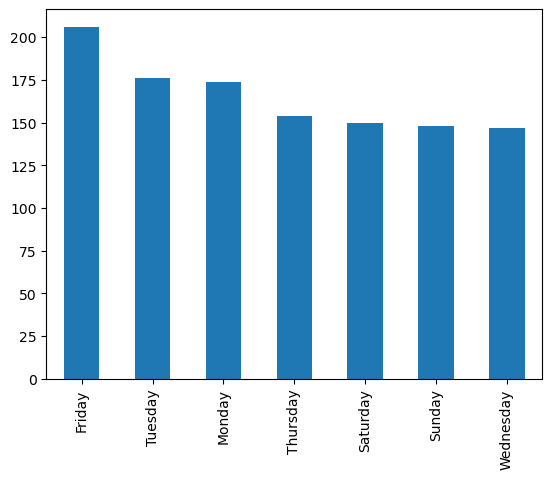

In [106]:
#days having highest trips
uber['Weekday'].value_counts().plot.bar()

In [107]:
import plotly.express as px

# Assuming 'uber' is your DataFrame
fig = px.bar(uber['Weekday'].value_counts(), labels={'index': 'Weekday', 'value': 'Count'})
fig.update_layout(title='Uber Trips by Weekday', xaxis_title='Weekday', yaxis_title='Count')

# Add hover information
fig.update_traces(hovertemplate='Weekday: %{x}<br>Count: %{y}')

# Show the interactive plot
fig


<Axes: >

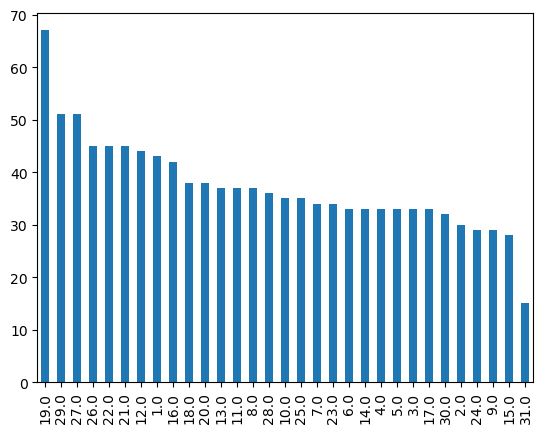

In [108]:
#number of trips on each day
uber['Day'].value_counts().plot.bar()

In [109]:
import plotly.express as px

# Assuming 'uber' is your DataFrame
fig = px.bar(uber['Day'].value_counts().reset_index(), x='index', y='Day', labels={'index': 'Day', 'Day': 'Count'})
fig.update_layout(title='Uber Trips by Day', xaxis_title='Day', yaxis_title='Count')
fig

<Axes: >

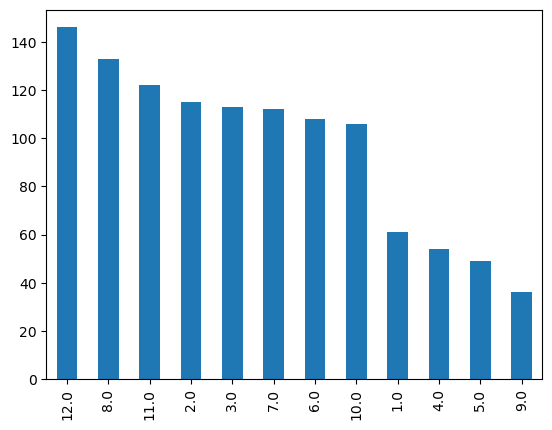

In [110]:
uber['Month'].value_counts().plot.bar()

In [113]:
import plotly.express as px

# Assuming 'uber' is your DataFrame
month_counts = uber['Month'].value_counts().sort_index().reset_index()

fig = px.bar(month_counts, x='index', y='Month', labels={'index': 'Month', 'Month': 'Count'})
fig.update_layout(title='Uber Trips by Month', xaxis_title='Month', yaxis_title='Count')

# Add hover information
fig.update_traces(hovertemplate='Month: %{x}<br>Count: %{y}')

# Show the interactive plot
fig.show()


In [114]:
uber.describe()

,MILES*,Hour,Day,Day Of Week,Month
count,1156.000000,1155.000000,1155.000000,1155.000000,1155.000000
mean,21.115398,14.696104,16.309091,2.938528,6.982684
std,359.299007,4.575226,8.713157,1.985789,3.544915
min,0.500000,0.000000,1.000000,0.000000,1.000000
25%,2.900000,12.000000,9.000000,1.000000,3.500000
50%,6.000000,15.000000,17.000000,3.000000,7.000000
75%,10.400000,18.000000,24.000000,5.000000,10.000000
max,12204.700000,23.000000,31.000000,6.000000,12.000000
